# Introduction and rules of the QRT Challenge

The challenge aim is to model the electricity price from weather, energy (commodities) and commercial data for two European countries - France and Germany.

Every day, a multitude of factors impact the price of electricity. Local weather variations will affect both electricity generation and demand. Long term phenomena, such as global warming, will also have a significant influence. Geopolitical events, such as the war in Ukraine, may affect in parallel the price of commodities, which are key inputs in electricity generation, knowing that each country relies on a particular energy mix (nuclear, solar, hydro, gas, coal, etc). Moreover, each country may import/export electricity with its neighbours through dynamical markets, like in Europe. These various elements make the modelling of electricity price in each country quite complex.


The participants are provided with daily data for each country which involve weather quantitative measurements (temperature, rain, wind), energetic production (commodity price changes), and electricity use (consumption, exchanges between the two countries, import-export with the rest of Europe). The score function (metric) used is the Spearman's correlation between the participant's output and the actual daily price changes over the testing dataset sample.

# Initialisation

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

In [ ]:
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('x_test.csv')


In [ ]:
x_train.head()

In [ ]:
y_train.head()

,ID,TARGET
0,1054,0.028313
1,2049,-0.112516
2,1924,-0.180840
3,297,-0.260356
4,1101,-0.071733


# Graphs to better grasp the situation (EDA)


## French and German Electricity Consumption plotted over time

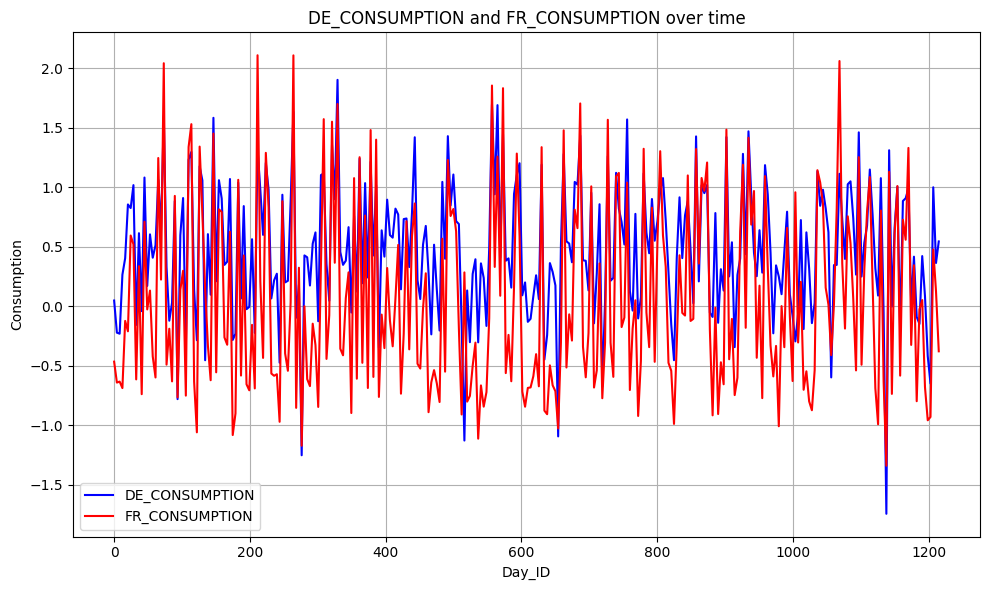

In [ ]:
from scipy.interpolate import interp1d

# Extract the columns
day_id = x_train['DAY_ID']
de_consumption = x_train['DE_CONSUMPTION']
fr_consumption = x_train['FR_CONSUMPTION']

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

# Linear interpolation for DE_CONSUMPTION
f_de = interp1d(day_id, de_consumption, kind='linear')
x_new = np.linspace(day_id.min(), day_id.max(), 300)
y_new_de = f_de(x_new)
plt.plot(x_new, y_new_de, label='DE_CONSUMPTION', color='b')

# Linear interpolation for FR_CONSUMPTION
f_fr = interp1d(day_id, fr_consumption, kind='linear')
y_new_fr = f_fr(x_new)
plt.plot(x_new, y_new_fr, label='FR_CONSUMPTION', color='r')

# Add labels and a legend
plt.xlabel('Day_ID')
plt.ylabel('Consumption')
plt.title('DE_CONSUMPTION and FR_CONSUMPTION over time')
plt.legend()

# Visualise the plot
plt.grid(True)
plt.tight_layout()
plt.show()


## French and German Net Electricity Import plotted over time


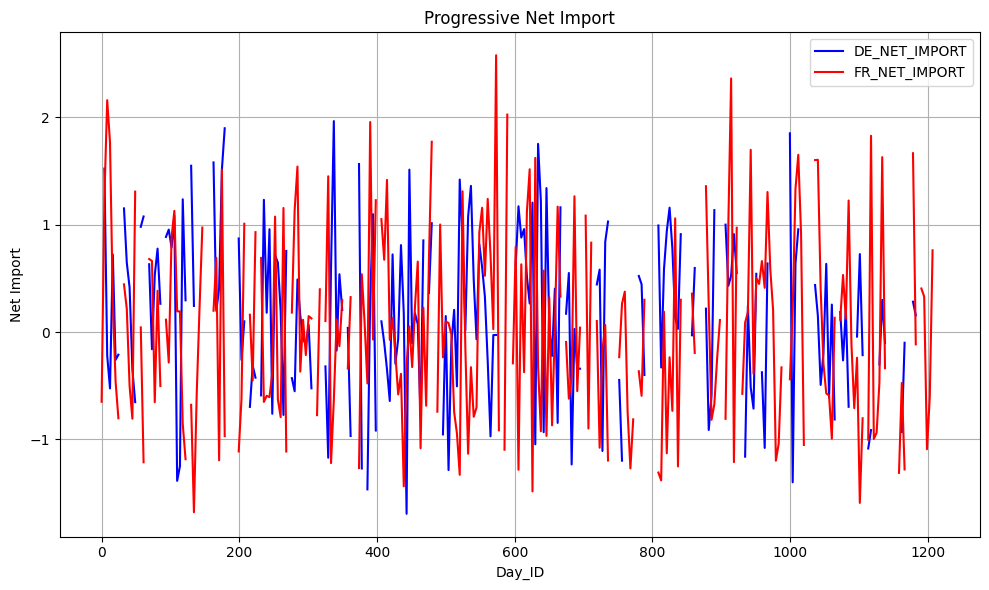

In [ ]:
from scipy.interpolate import interp1d

# Extract the columns
day_id = x_train['DAY_ID']
de_net_import = x_train['DE_NET_IMPORT']
fr_net_import = x_train['FR_NET_IMPORT']

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

f_de_net_import = interp1d(day_id, de_net_import, kind='linear')
x_new = np.linspace(day_id.min(), day_id.max(), 300)
y_new_de_net_import = f_de_net_import(x_new)
plt.plot(x_new, y_new_de_net_import, label='DE_NET_IMPORT', color='b')

f_fr_net_import = interp1d(day_id, fr_net_import, kind='linear')
y_new_fr_net_import = f_fr_net_import(x_new)
plt.plot(x_new, y_new_fr_net_import, label='FR_NET_IMPORT', color='r')

# Add labels and a legend
plt.xlabel('Day_ID')
plt.ylabel('Net Import')
plt.title('Progressive Net Import')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

We can clearly notice some values are missing, leaving gaps in the graphs above

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1494 non-null   int64  
 1   DAY_ID            1494 non-null   int64  
 2   COUNTRY           1494 non-null   object 
 3   DE_CONSUMPTION    1494 non-null   float64
 4   FR_CONSUMPTION    1494 non-null   float64
 5   DE_FR_EXCHANGE    1469 non-null   float64
 6   FR_DE_EXCHANGE    1469 non-null   float64
 7   DE_NET_EXPORT     1370 non-null   float64
 8   FR_NET_EXPORT     1424 non-null   float64
 9   DE_NET_IMPORT     1370 non-null   float64
 10  FR_NET_IMPORT     1424 non-null   float64
 11  DE_GAS            1494 non-null   float64
 12  FR_GAS            1494 non-null   float64
 13  DE_COAL           1494 non-null   float64
 14  FR_COAL           1494 non-null   float64
 15  DE_HYDRO          1494 non-null   float64
 16  FR_HYDRO          1494 non-null   float64


In [ ]:
import plotly.express as px
c = 'DE_RAIN'
# Create a line plot
fig = px.line(x_train.sort_values(by=['DAY_ID']), x='DAY_ID', y=c, color='COUNTRY',title='Interactive Line Plot')

# Show the plot
fig.show()


In [ ]:
c = 'DE_RAIN'
# Create a line plot
fig = px.line(x_train.sort_values(by=['DAY_ID']).query("COUNTRY=='DE'"), x='DAY_ID', y=['DE_GAS','FR_GAS'],title='Interactive Line Plot')

# Show the plot
fig.show()

## French and German Residual Load plotted over time

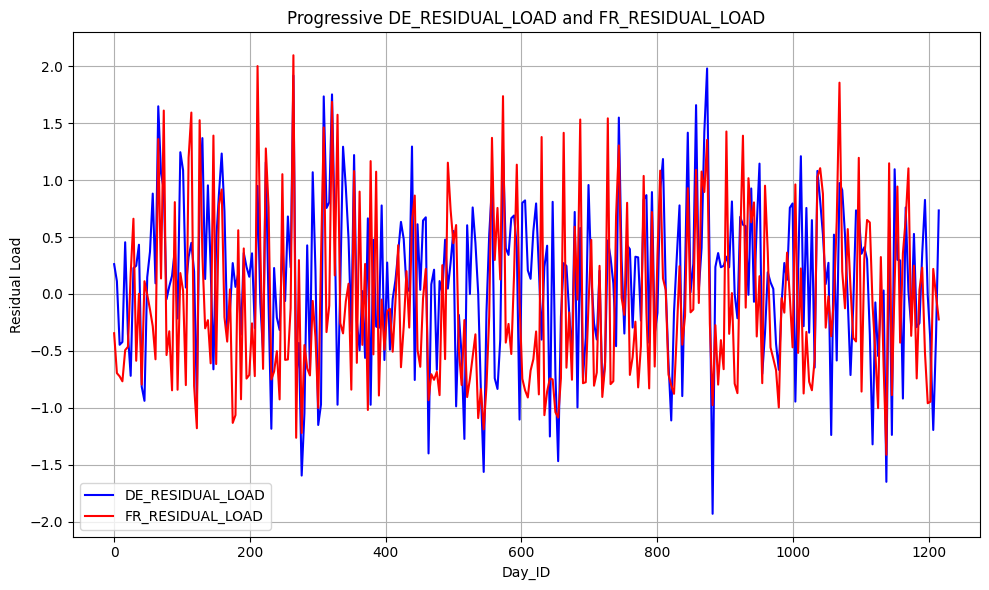

In [ ]:
from scipy.interpolate import interp1d

# Extract the columns
day_id = x_train['DAY_ID']
de_residual_load = x_train['DE_RESIDUAL_LOAD']
fr_residual_load = x_train['FR_RESIDUAL_LOAD']

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

# Linear interpolation for DE_RESIDUAL_LOAD
f_de_residual_load = interp1d(day_id, de_residual_load, kind='linear')
x_new = np.linspace(day_id.min(), day_id.max(), 300)
y_new_de_residual_load = f_de_residual_load(x_new)
plt.plot(x_new, y_new_de_residual_load, label='DE_RESIDUAL_LOAD', color='b')

# Linear interpolation for FR_RESIDUAL_LOAD
f_fr_residual_load = interp1d(day_id, fr_residual_load, kind='linear')
y_new_fr_residual_load = f_fr_residual_load(x_new)
plt.plot(x_new, y_new_fr_residual_load, label='FR_RESIDUAL_LOAD', color='r')

# Add labels and a legend
plt.xlabel('Day_ID')
plt.ylabel('Residual Load')
plt.title('Progressive DE_RESIDUAL_LOAD and FR_RESIDUAL_LOAD')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

"Residual load is an indicator in a power system. It shows how much capacity is left for conventional power plants to operate."

Source: https://energypedia.info/wiki/Residual_Load#:~:text=Residual%20load%20is%20an%20indicator,with%20the%20demand%20load%20curve.


## Electricity Sources Price Evolution - France

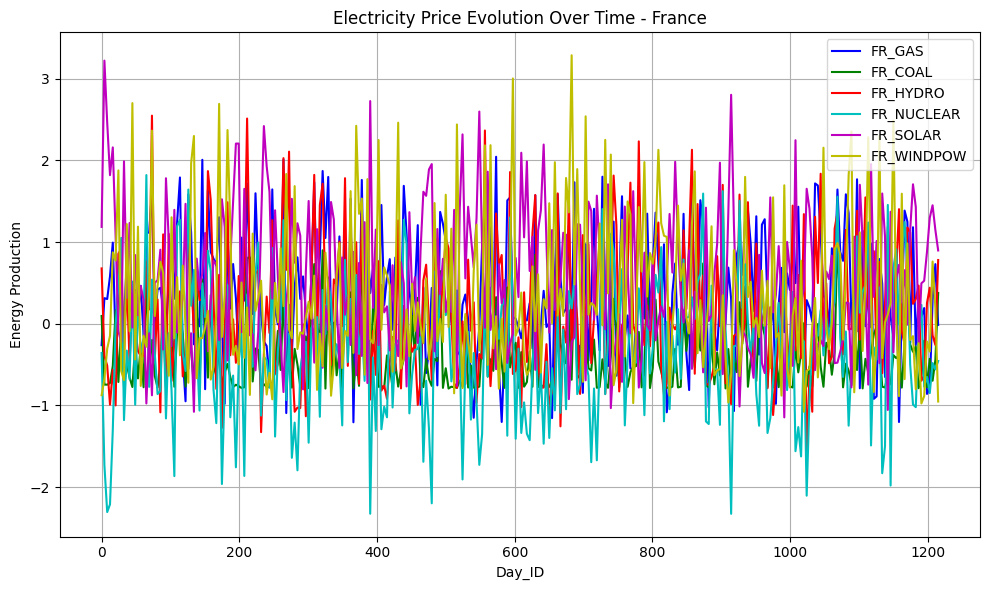

In [ ]:
from scipy.interpolate import interp1d

day_id = x_train['DAY_ID']
fr_gas = x_train['FR_GAS']
fr_coal = x_train['FR_COAL']
fr_hydro = x_train['FR_HYDRO']
fr_nuclear = x_train['FR_NUCLEAR']
fr_solar = x_train['FR_SOLAR']
fr_windpow = x_train['FR_WINDPOW']

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

# Linear interpolation for FR_GAS
f_fr_gas = interp1d(day_id, fr_gas, kind='linear')
x_new = np.linspace(day_id.min(), day_id.max(), 300)
y_new_fr_gas = f_fr_gas(x_new)
plt.plot(x_new, y_new_fr_gas, label='FR_GAS', color='b')

# Linear interpolation for FR_COAL
f_fr_coal = interp1d(day_id, fr_coal, kind='linear')
y_new_fr_coal = f_fr_coal(x_new)
plt.plot(x_new, y_new_fr_coal, label='FR_COAL', color='g')

# Linear interpolation for FR_HYDRO
f_fr_hydro = interp1d(day_id, fr_hydro, kind='linear')
y_new_fr_hydro = f_fr_hydro(x_new)
plt.plot(x_new, y_new_fr_hydro, label='FR_HYDRO', color='r')

# Linear interpolation for FR_NUCLEAR
f_fr_nuclear = interp1d(day_id, fr_nuclear, kind='linear')
y_new_fr_nuclear = f_fr_nuclear(x_new)
plt.plot(x_new, y_new_fr_nuclear, label='FR_NUCLEAR', color='c')

# Linear interpolation for FR_SOLAR
f_fr_solar = interp1d(day_id, fr_solar, kind='linear')
y_new_fr_solar = f_fr_solar(x_new)
plt.plot(x_new, y_new_fr_solar, label='FR_SOLAR', color='m')

# Linear interpolation for FR_WINDPOW
f_fr_windpow = interp1d(day_id, fr_windpow, kind='linear')
y_new_fr_windpow = f_fr_windpow(x_new)
plt.plot(x_new, y_new_fr_windpow, label='FR_WINDPOW', color='y')

# Add labels and a legend
plt.xlabel('Day_ID')
plt.ylabel('Electricity Price Variation')
plt.title('Electricity Sources Price Evolution Over Time - France')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

We notice that electricity coming from nuclear sources in France tends to be among the cheapest, whereas solar and windpower based sources tend to among the most expensive sources

## Electricity Sources Price Evolution - Germany


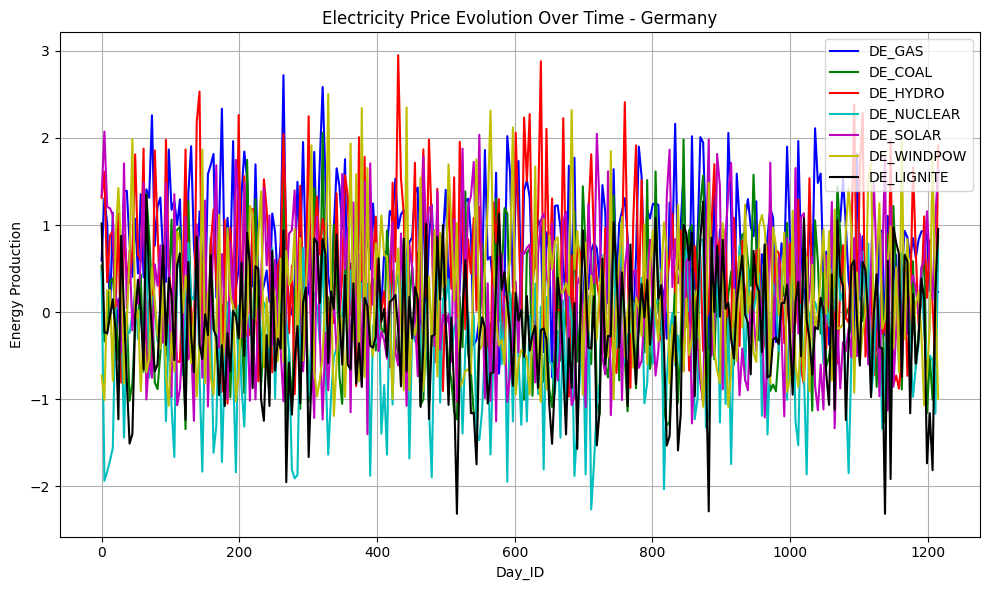

In [ ]:
from scipy.interpolate import interp1d

day_id = x_train['DAY_ID']
de_gas = x_train['DE_GAS']
de_coal = x_train['DE_COAL']
de_hydro = x_train['DE_HYDRO']
de_nuclear = x_train['DE_NUCLEAR']
de_solar = x_train['DE_SOLAR']
de_windpow = x_train['DE_WINDPOW']
de_lignite = x_train['DE_LIGNITE']

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

# Linear interpolation for DE_GAS
f_de_gas = interp1d(day_id, de_gas, kind='linear')
x_new = np.linspace(day_id.min(), day_id.max(), 300)
y_new_de_gas = f_de_gas(x_new)
plt.plot(x_new, y_new_de_gas, label='DE_GAS', color='b')

# Linear interpolation for DE_COAL
f_de_coal = interp1d(day_id, de_coal, kind='linear')
y_new_de_coal = f_de_coal(x_new)
plt.plot(x_new, y_new_de_coal, label='DE_COAL', color='g')

# Linear interpolation for DE_HYDRO
f_de_hydro = interp1d(day_id, de_hydro, kind='linear')
y_new_de_hydro = f_de_hydro(x_new)
plt.plot(x_new, y_new_de_hydro, label='DE_HYDRO', color='r')

# Linear interpolation for DE_NUCLEAR
f_de_nuclear = interp1d(day_id, de_nuclear, kind='linear')
y_new_de_nuclear = f_de_nuclear(x_new)
plt.plot(x_new, y_new_de_nuclear, label='DE_NUCLEAR', color='c')

# Linear interpolation for DE_SOLAR
f_de_solar = interp1d(day_id, de_solar, kind='linear')
y_new_de_solar = f_de_solar(x_new)
plt.plot(x_new, y_new_de_solar, label='DE_SOLAR', color='m')

# Linear interpolation for DE_WINDPOW
f_de_windpow = interp1d(day_id, de_windpow, kind='linear')
y_new_de_windpow = f_de_windpow(x_new)
plt.plot(x_new, y_new_de_windpow, label='DE_WINDPOW', color='y')

# Linear interpolation for DE_LIGNITE
f_de_lignite = interp1d(day_id, de_lignite, kind='linear')
y_new_de_lignite = f_de_lignite(x_new)
plt.plot(x_new, y_new_de_lignite, label='DE_LIGNITE', color='k')

# Add labels and a legend
plt.xlabel('Day_ID')
plt.ylabel('Electricity Price Variation')
plt.title('Electricity Source Price Evolution Over Time - Germany')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

Here we notice Lignite and Nuclear tend to give the most competitive prices

## Total Electricity Price Variation - France


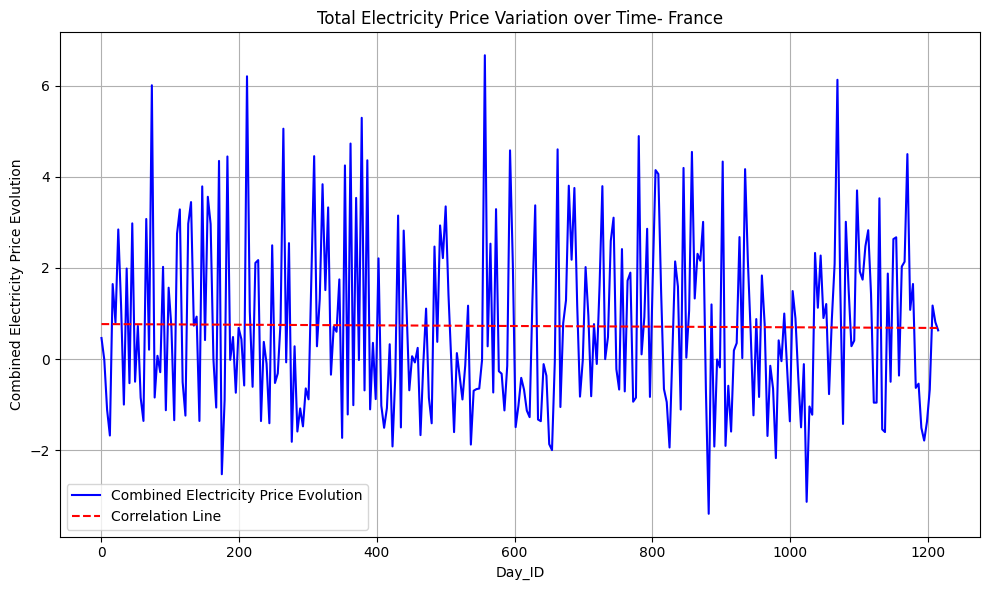

In [ ]:
from scipy.interpolate import interp1d

# Extract the columns
day_id = x_train['DAY_ID']
fr_gas = x_train['FR_GAS']
fr_coal = x_train['FR_COAL']
fr_hydro = x_train['FR_HYDRO']
fr_nuclear = x_train['FR_NUCLEAR']
fr_solar = x_train['FR_SOLAR']
fr_windpow = x_train['FR_WINDPOW']

# Calculate the sum of the specified energy sources
total_energy_production = (
    fr_gas + fr_coal + fr_hydro + fr_nuclear + fr_solar + fr_windpow
)

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

# Linear interpolation for the total energy production
f_total_energy_production = interp1d(day_id, total_energy_production, kind='linear')
x_new = np.linspace(day_id.min(), day_id.max(), 300)
y_new_total_energy_production = f_total_energy_production(x_new)
plt.plot(x_new, y_new_total_energy_production, label='Combined Electricity Price Evolution', color='b')

# Calculate linear regression line (corr line)
slope, intercept = np.polyfit(x_new, y_new_total_energy_production, 1)
corr_line = slope * x_new + intercept

# Plot the corr line
plt.plot(x_new, corr_line, label='Correlation Line', color='r', linestyle='--')

# Add labels and a legend
plt.xlabel('Day_ID')
plt.ylabel('Combined Electricity Price Evolution')
plt.title('Total Electricity Price Variation over Time- France')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

We notice the correlation line is above 0 for the duration of the time period we are studying: the trend is very clearly that electricity prices are on the rise

## Total Electricity Price Variation - Germany

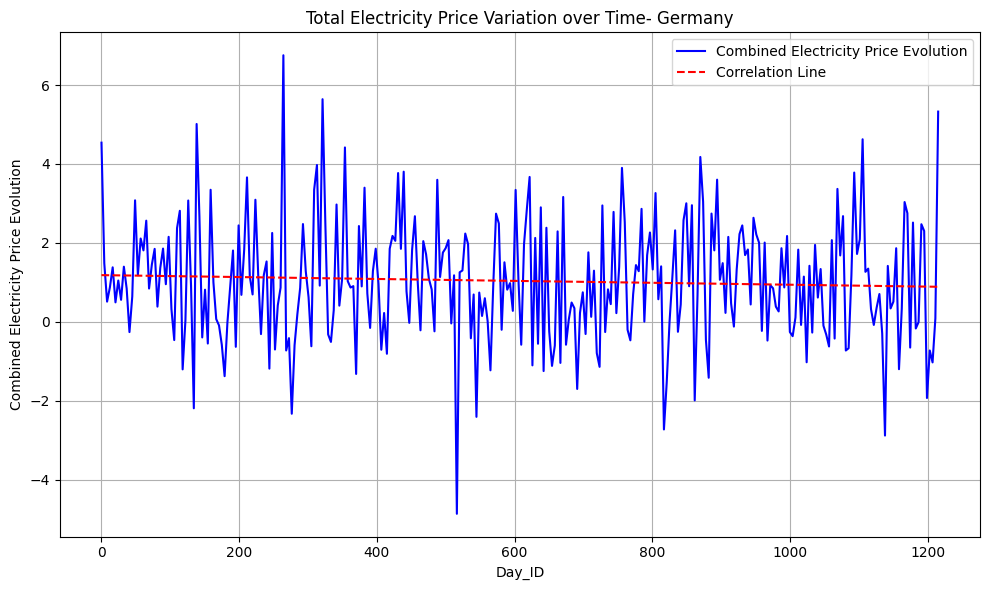

In [ ]:
from scipy.interpolate import interp1d

# Extract the columns
day_id = x_train['DAY_ID']
de_gas = x_train['DE_GAS']
de_coal = x_train['DE_COAL']
de_hydro = x_train['DE_HYDRO']
de_nuclear = x_train['DE_NUCLEAR']
de_solar = x_train['DE_SOLAR']
de_windpow = x_train['DE_WINDPOW']
de_lignite = x_train['DE_LIGNITE']

# Calculate the sum of the specified energy sources
total_energy_production = (
    de_gas + de_coal + de_hydro + de_nuclear + de_solar + de_windpow + de_lignite
)

# Create a figure and axis for the plot
plt.figure(figsize=(10, 6))

# Linear interpolation for the total energy production
f_total_energy_production = interp1d(day_id, total_energy_production, kind='linear')
x_new = np.linspace(day_id.min(), day_id.max(), 300)
y_new_total_energy_production = f_total_energy_production(x_new)
slope, intercept = np.polyfit(x_new, y_new_total_energy_production, 1)
corr_line = slope * x_new + intercept
plt.plot(x_new, y_new_total_energy_production, label='Combined Electricity Price Evolution', color='b')

# Add labels and a legend
plt.xlabel('Day_ID')
plt.ylabel('Combined Electricity Price Evolution')
plt.title('Total Electricity Price Variation over Time- Germany')
plt.plot(x_new, corr_line, label='Correlation Line', color='r', linestyle='--')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

Here, the graph behind over 0 for the majority of the days, we notice that there is a trend: electricity prices are on the rise in Germany, just as in the case in France

## Correlation between Electricity Sources and Weather

In [ ]:
fr_windpow = x_train['FR_WINDPOW']
fr_wind = x_train['FR_WIND']

# Calculate the correlation between FR_WINDPOW and FR_WIND
correlation = fr_windpow.corr(fr_wind)

print(f"Correlation between FR_WINDPOW and FR_WIND: {correlation:.2f}")

Correlation between FR_WINDPOW and FR_WIND: 0.47


In [ ]:
fr_solar = x_train['FR_SOLAR']
fr_temp = x_train['FR_TEMP']

# Calculate the correlation between FR_WINDPOW and FR_WIND
correlation = fr_solar.corr(fr_temp)

print(f"Correlation between FR_SOLAR and FR_TEMP: {correlation:.2f}")

Correlation between FR_SOLAR and FR_TEMP: 0.08


In [ ]:
fr_hydro = x_train['FR_HYDRO']
fr_rain = x_train['FR_RAIN']

# Calculate the correlation between FR_WINDPOW and FR_WIND
correlation = fr_hydro.corr(fr_rain)

print(f"Correlation between FR_HYDRO and FR_RAIN: {correlation:.2f}")

Correlation between FR_HYDRO and FR_RAIN: 0.04


In [ ]:
# Filter the data based on the conditions (lack of rain, temperature, and wind)
filtered_data = x_train[
    (x_train['FR_RAIN'] < x_train['FR_RAIN'].mean()) &
    (x_train['FR_TEMP'] < x_train['FR_TEMP'].mean()) &
    (x_train['FR_WIND'] < x_train['FR_WIND'].mean())
]

# Extract the nuclear energy production (FR_NUCLEAR)
fr_nuclear = filtered_data['FR_NUCLEAR']

# Calculate the correlation between FR_NUCLEAR and the lack of rain
correlation_rain = fr_nuclear.corr(filtered_data['FR_RAIN'])

# Calculate the correlation between FR_NUCLEAR and the lack of temperature
correlation_temp = fr_nuclear.corr(filtered_data['FR_TEMP'])

# Calculate the correlation between FR_NUCLEAR and the lack of wind
correlation_wind = fr_nuclear.corr(filtered_data['FR_WIND'])

print(f"Correlation between FR_NUCLEAR and Lack of Rain (Threshold as Mean): {correlation_rain:.2f}")
print(f"Correlation between FR_NUCLEAR and Lack of Temperature (Threshold as Mean): {correlation_temp:.2f}")
print(f"Correlation between FR_NUCLEAR and Lack of Wind (Threshold as Mean): {correlation_wind:.2f}")

Correlation between FR_NUCLEAR and Total Production (Threshold as Mean): 0.34


In [ ]:
de_windpow = x_train['DE_WINDPOW']
de_wind = x_train['DE_WIND']

# Calculate the correlation between DE_WINDPOW and DE_WIND
correlation = de_windpow.corr(de_wind)

print(f"Correlation between DE_WINDPOW and DE_WIND: {correlation:.2f}")

Correlation between DE_WINDPOW and DE_WIND: 0.51


In [ ]:
de_solar = x_train['DE_SOLAR']
de_temp = x_train['DE_TEMP']

# Calculate the correlation between DE_WINDPOW and DE_WIND
correlation = de_solar.corr(de_temp)

print(f"Correlation between DE_SOLAR and DE_TEMP: {correlation:.2f}")

Correlation between DE_SOLAR and DE_TEMP: -0.02


In [ ]:
de_hydro = x_train['DE_HYDRO']
de_rain = x_train['DE_RAIN']

# Calculate the correlation between DE_WINDPOW and DE_WIND
correlation = de_hydro.corr(de_rain)

print(f"Correlation between DE_HYDRO and DE_RAIN: {correlation:.2f}")

Correlation between DE_HYDRO and DE_RAIN: -0.09


In [ ]:
# Filter the data based on the conditions (lack of rain, temperature, and wind)
filtered_data = x_train[
    (x_train['DE_RAIN'] < x_train['DE_RAIN'].mean()) &
    (x_train['DE_TEMP'] < x_train['DE_TEMP'].mean()) &
    (x_train['DE_WIND'] < x_train['DE_WIND'].mean())
]

# Extract the nuclear energy production (DE_NUCLEAR)
de_nuclear = filtered_data['DE_NUCLEAR']

# Calculate the correlation between DE_NUCLEAR and the lack of rain
correlation_rain = de_nuclear.corr(filtered_data['DE_RAIN'])

# Calculate the correlation between DE_NUCLEAR and the lack of temperature
correlation_temp = de_nuclear.corr(filtered_data['DE_TEMP'])

# Calculate the correlation between DE_NUCLEAR and the lack of wind
correlation_wind = de_nuclear.corr(filtered_data['DE_WIND'])

print(f"Correlation between DE_NUCLEAR and Lack of Rain (Threshold as Mean): {correlation_rain:.2f}")
print(f"Correlation between DE_NUCLEAR and Lack of Temperature (Threshold as Mean): {correlation_temp:.2f}")
print(f"Correlation between DE_NUCLEAR and Lack of Wind (Threshold as Mean): {correlation_wind:.2f}")

Correlation between DE_NUCLEAR and Lack of Rain (Threshold as Mean): 0.20
Correlation between DE_NUCLEAR and Lack of Temperature (Threshold as Mean): -0.10
Correlation between DE_NUCLEAR and Lack of Wind (Threshold as Mean): -0.27


# Model

## Correlation Matrix

In [ ]:
correlation_matrix=x_train.corr()
# Create a heatmap of the correlation matrix
fig = px.imshow(correlation_matrix, color_continuous_scale='RdBu', title='Correlation Matrix Heatmap')
fig.update_layout(height=800, width=1000)
# Show the plot
fig.show()

<ipython-input-19-b31c7ad4c41f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
x_train.columns

Index(['ID', 'DAY_ID', 'COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET'],
      dtype='object')

In [ ]:
columns_to_correlate = [
    'DE_CONSUMPTION', 'FR_CONSUMPTION', 'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE',
    'DE_NET_EXPORT', 'FR_NET_EXPORT', 'DE_NET_IMPORT', 'FR_NET_IMPORT',
    'DE_GAS', 'FR_GAS', 'DE_COAL', 'FR_COAL', 'DE_HYDRO', 'FR_HYDRO',
    'DE_NUCLEAR', 'FR_NUCLEAR', 'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW',
    'DE_LIGNITE', 'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN',
    'DE_WIND', 'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET'
]

# Calculate the correlation matrix for the specified columns
correlation_matrix = x_train[columns_to_correlate].corr()

# Print the correlation matrix
print(correlation_matrix)

                  DE_CONSUMPTION  FR_CONSUMPTION  DE_FR_EXCHANGE  \
DE_CONSUMPTION          1.000000        0.813202        0.423988   
FR_CONSUMPTION          0.813202        1.000000        0.496264   
DE_FR_EXCHANGE          0.423988        0.496264        1.000000   
FR_DE_EXCHANGE         -0.423988       -0.496264       -1.000000   
DE_NET_EXPORT           0.541806        0.545595        0.703962   
FR_NET_EXPORT          -0.131230       -0.229635       -0.677812   
DE_NET_IMPORT          -0.541806       -0.545595       -0.703962   
FR_NET_IMPORT           0.131230        0.229635        0.677812   
DE_GAS                  0.233345        0.378877        0.030742   
FR_GAS                  0.632066        0.779727        0.470966   
DE_COAL                 0.455872        0.478193        0.408725   
FR_COAL                 0.522945        0.580789        0.393705   
DE_HYDRO               -0.365692       -0.422262       -0.321357   
FR_HYDRO                0.394448        0.619409

## Strong Correlation: correlation >= 0.7

In [ ]:
columns_to_correlate = [
    'DE_CONSUMPTION', 'FR_CONSUMPTION', 'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE',
    'DE_NET_EXPORT', 'FR_NET_EXPORT', 'DE_NET_IMPORT', 'FR_NET_IMPORT',
    'DE_GAS', 'FR_GAS', 'DE_COAL', 'FR_COAL', 'DE_HYDRO', 'FR_HYDRO',
    'DE_NUCLEAR', 'FR_NUCLEAR', 'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW',
    'DE_LIGNITE', 'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN',
    'DE_WIND', 'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET'
]

# Calculate the correlation matrix for the specified columns
correlation_matrix = x_train[columns_to_correlate].corr()

# Find correlations greater than 0.7
high_correlations = {}

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if (correlation_matrix.iloc[i, j]) > 0.7:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            correlation_value = correlation_matrix.iloc[i, j]
            high_correlations[(col1, col2)] = correlation_value

# Print the correlations greater than 0.7
for (col1, col2), correlation_value in high_correlations.items():
    print(f"Correlation between {col1} and {col2}: {correlation_value:.2f}")

Correlation between DE_CONSUMPTION and FR_CONSUMPTION: 0.81
Correlation between DE_CONSUMPTION and FR_RESIDUAL_LOAD: 0.75
Correlation between FR_CONSUMPTION and FR_GAS: 0.78
Correlation between FR_CONSUMPTION and FR_NUCLEAR: 0.71
Correlation between FR_CONSUMPTION and FR_RESIDUAL_LOAD: 0.97
Correlation between DE_FR_EXCHANGE and DE_NET_EXPORT: 0.70
Correlation between FR_DE_EXCHANGE and DE_NET_IMPORT: 0.70
Correlation between DE_NET_EXPORT and DE_WINDPOW: 0.76
Correlation between DE_GAS and DE_RESIDUAL_LOAD: 0.72
Correlation between FR_GAS and FR_RESIDUAL_LOAD: 0.80
Correlation between DE_COAL and DE_LIGNITE: 0.73
Correlation between FR_NUCLEAR and FR_RESIDUAL_LOAD: 0.72
Correlation between DE_SOLAR and FR_SOLAR: 0.80
Correlation between DE_LIGNITE and DE_RESIDUAL_LOAD: 0.71
Correlation between DE_WIND and FR_WIND: 0.82


## Trying different models

In [ ]:
y_train

,ID,TARGET
0,1054,0.028313
1,2049,-0.112516
2,1924,-0.180840
3,297,-0.260356
4,1101,-0.071733
...,...,...
1489,459,-0.172597
1490,1674,-0.063546
1491,748,0.151797
1492,1454,-0.640917


In [ ]:
data = x_train.merge(y_train, how="left",on="ID")
data

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445,0.028313
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365,-0.112516
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952,-0.180840
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948,-0.260356
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378,-0.071733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,459,809,DE,1.529204,1.106682,-1.855327,1.855327,-0.218658,1.450426,0.218658,...,NaN,NaN,NaN,NaN,NaN,NaN,0.876984,0.819520,1.320373,-0.172597
1490,1674,887,FR,1.618582,1.752840,0.611392,-0.611392,0.449153,-0.152146,-0.449153,...,NaN,NaN,NaN,NaN,NaN,NaN,0.932633,-0.085690,0.356356,-0.063546
1491,748,1083,DE,0.856399,0.489199,-0.255778,0.255778,-1.531544,-0.829568,1.531544,...,0.207905,0.404763,-0.594595,0.894011,0.256338,0.402316,-1.112899,-0.237835,0.067152,0.151797
1492,1454,1133,FR,0.560689,-0.343777,-0.830239,0.830239,-0.304856,1.210230,0.304856,...,-0.682815,-0.390304,-0.972088,-1.501930,1.215528,1.338708,0.962812,-5.392852,-0.843812,-0.640917


In [ ]:
data = x_train.merge(y_train, how="left",on="ID")
data_de = data.copy().query("COUNTRY == 'DE'")
data_fr = data.copy().query("COUNTRY == 'FR'")

# Define the columns to remove
columns_to_remove = ['ID', 'COUNTRY','DE_CONSUMPTION','DE_NET_EXPORT','FR_NET_EXPORT']
columns = x_train.columns
columns_to_use = [x for x in columns if x not in columns_to_remove]
data_de = data_de.drop(columns = columns_to_remove, inplace=True)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
imputer = SimpleImputer(strategy='mean')  # You can choose a different imputation strategy


### Data Processing

In [ ]:
data = x_train.merge(y_train, how="left",on="ID")
data_de = data.copy().query("COUNTRY == 'DE'")
data_fr = data.copy().query("COUNTRY == 'FR'")

# Define the columns to remove
columns_to_remove = ['ID', 'COUNTRY','DE_CONSUMPTION','DE_NET_EXPORT','FR_NET_EXPORT']
columns = x_train.columns
columns_to_use = [x for x in columns if x not in columns_to_remove]
data_de = data_de.drop(columns = columns_to_remove)
X_de = data_de.drop('TARGET', axis=1)
y_de = data_de['TARGET']
X_de = imputer.fit_transform(X_de)


### Random Forest DE

In [ ]:
model_de  = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
grid_search_de = GridSearchCV(model_de, param_grid, cv=5)

grid_search_de.fit(X_de, y_de)

predictions_de = grid_search_de.predict(X_de)  # Replace X_de_imputed with your test data for 'DE'

### XGBoost DE

In [ ]:
# Define an XGBoost Regressor
xgb_regressor = xgb.XGBRegressor()

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],n
    'learning_rate': [0.1, 0.01, 0.001],
    'objective': ['reg:squarederror']
}

# Perform cross-validated hyperparameter tuing
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Use k-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=cv)


# Fit the regressor with cross-validation
grid_search.fit(X_de, y_de)

# Get the best estimator and hyperparameters
best_regressor_de = grid_search.best_estimator_
best_params_de = grid_search.best_params_

# Evaluate the model using cross-validation scores
mse_scores = -grid_search.cv_results_['mean_test_score']  # Negative because GridSearchCV maximizes
rmse_scores = (mse_scores)**0.5
print("Best Hyperparameters:", best_params)
print(f"Mean Squared Error Scores: {mse_scores}")
print(f"Root Mean Squared Error Scores: {rmse_scores}")

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'objective': 'reg:squarederror'}
Mean Squared Error Scores: [1.14677162 1.19165381 1.23362235 1.18081045 1.19996542 1.20611927
 1.21315799 1.22697335 1.2280166  1.06979713 1.06074144 1.07081775
 1.08809485 1.08905031 1.11156977 1.09577182 1.1207947  1.14781835
 1.09171129 1.08789256 1.08157224 1.0936315  1.09133641 1.08884136
 1.09109154 1.08826514 1.0862967 ]
Root Mean Squared Error Scores: [1.07087423 1.09162897 1.11068553 1.08665102 1.09542933 1.09823462
 1.10143452 1.10768829 1.10815911 1.03430998 1.02992303 1.03480324
 1.04311785 1.04357573 1.05431009 1.0467912  1.05867592 1.07136285
 1.04484989 1.04302088 1.03998665 1.04576838 1.04467048 1.04347562
 1.04455327 1.04319947 1.04225558]


In [ ]:
# best_regressor_de = grid_search.best_estimator_
# best_params_de = grid_search.best_params_
# predictions = best_regressor_de.predict(X_de)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
data_fr = data.copy().query("COUNTRY == 'FR'")

# Define the columns to remove
data_fr = data_fr.drop(columns = columns_to_remove)
X_fr = data_fr.drop('TARGET', axis=1)
y_fr = data_fr['TARGET']
X_fr = imputer.fit_transform(X_fr)


### Random Forest FR

In [ ]:
model_fr  = RandomForestRegressor()

param_grid_fr = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}
grid_search_fr = GridSearchCV(model_fr, param_grid_fr, cv=5)

grid_search_fr.fit(X_fr, y_fr)

predictions_fr = grid_search_de.predict(X_fr)  # Replace X_de_imputed with your test data for 'DE'

### XGBoost FR

In [ ]:
# Define an XGBoost Regressor
xgb_regressor_fr = xgb.XGBRegressor()

# Define hyperparameter grid for tuning
param_grid_fr = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'objective': ['reg:squarederror']
}

# Perform cross-validated hyperparameter tuning
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # Use k-fold cross-validation
grid_search_fr = GridSearchCV(estimator=xgb_regressor_fr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=cv)


# Fit the regressor with cross-validation
grid_search_fr.fit(X_fr, y_fr)

# Get the best estimator and hyperparameters
best_regressor_fr = grid_search_fr.best_estimator_
best_params_fr = grid_search_fr.best_params_

print("Best Hyperparameters:", best_params_fr)


Best Hyperparameters: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50, 'objective': 'reg:squarederror'}


## Spearman Correlation

In [ ]:
print('Spearman correlation for train set DE using RF {:.1f}%'.format(100 * spearmanr(grid_search_de.predict(X_de), y_de).correlation))
print('Spearman correlation for train set FR using RF {:.1f}%'.format(100 * spearmanr(predictions_fr, y_fr).correlation))
print('Spearman correlation for train set DE using XGBOOST {:.1f}%'.format(100 * spearmanr(best_regressor_de.predict(X_de), y_de).correlation))
print('Spearman correlation for train set FR using XGBOOST {:.1f}%'.format(100 * spearmanr(best_regressor_fr.predict(X_fr), y_fr).correlation))


Spearman correlation for train set DE using RF 93.3%
Spearman correlation for train set FR using RF 9.2%
Spearman correlation for train set DE using XGBOOST 48.7%
Spearman correlation for train set FR using XGBOOST 13.5%


In [ ]:
lr = LinearRegression()

Xt = x_train.drop(['COUNTRY'], axis=1).fillna(0)
yt = y_train['TARGET']

lr.fit(Xt, yt)

print('Spearman correlation for train set {:.1f}%'.format(100 * spearmanr(lr.predict(Xt), yt).correlation))

Spearman correlation for train set 27.9%


## Submission

In [ ]:
# Xv = x_test.drop(['COUNTRY'], axis=1).fillna(0)

# y_test_submission = x_test[['ID']].copy()
# y_test_submission['TARGET'] = lr.predict(Xv)
# y_test_submission.to_csv('benchmark_qrt.csv', index=False)

In [ ]:
test_de = x_test.copy().query("COUNTRY == 'DE'")
test_fr = x_test.copy().query("COUNTRY == 'FR'")

X_test_de = test_de.drop(columns = columns_to_remove)
X_test_de = imputer.fit_transform(X_test_de)
test_de['TARGET'] = grid_search_de.predict(X_test_de)

X_test_fr = test_fr.drop(columns = columns_to_remove)
X_test_fr = imputer.fit_transform(X_test_fr)
test_fr['TARGET'] = best_regressor_fr.predict(X_test_fr)

y_test_best = pd.concat([test_de[['ID','TARGET']],test_fr[['ID','TARGET']]], ignore_index=True)
y_test_best.to_csv('predictions_qrt.csv', index=False)

In [ ]:
Xv = x_test.drop(['COUNTRY'], axis=1).fillna(0)

y_test_submission = x_test[['ID']].copy()
y_test_submission['TARGET'] = lr.predict(Xv)
y_test_submission.to_csv('benchmark_qrt.csv', index=False)

Project made by Hyemin Oh, Antoine Divet and Jihwan Shin
